# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [2]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [3]:
ames.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [4]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

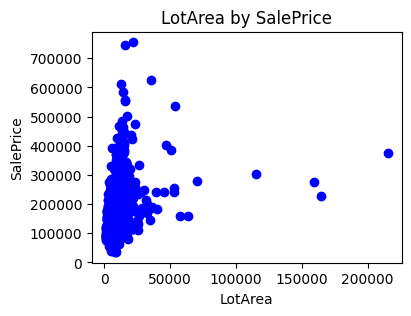

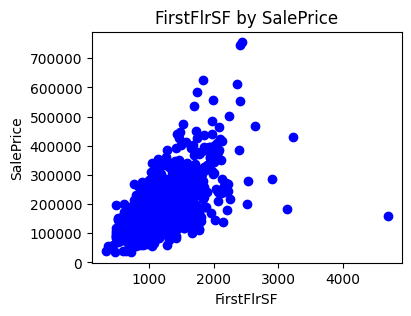

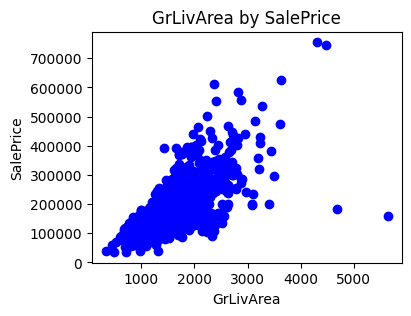

In [25]:
import matplotlib.pyplot as plt

def plot_scatter(x, y, x_label, y_label, title):
    plt.figure(figsize=(4, 3))
    plt.scatter(x, y, color='blue', label='Actual Data')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# Assuming LotArea, FirstFlrSF, GrLivArea, and SalePrice are defined
plot_scatter(LotArea, SalePrice, "LotArea", "SalePrice", "LotArea by SalePrice")
plot_scatter(FirstFlrSF, SalePrice, "FirstFlrSF", "SalePrice", "FirstFlrSF by SalePrice")
plot_scatter(GrLivArea, SalePrice, "GrLivArea", "SalePrice", "GrLivArea by SalePrice")


In [ ]:
# Your written answer here - do these seem like good candidates for linear regression?

The general living area and first floor spaces have are the best candidates for the regression

## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [29]:
# Your code here - define y and baseline X
x = np.array(GrLivArea)
y = np.array(SalePrice)


Model Interpretation:
Slope (m): 102.49
Intercept (b): 24899.75
R-squared: 0.55
Mean Squared Error (MSE): 3418946311.18


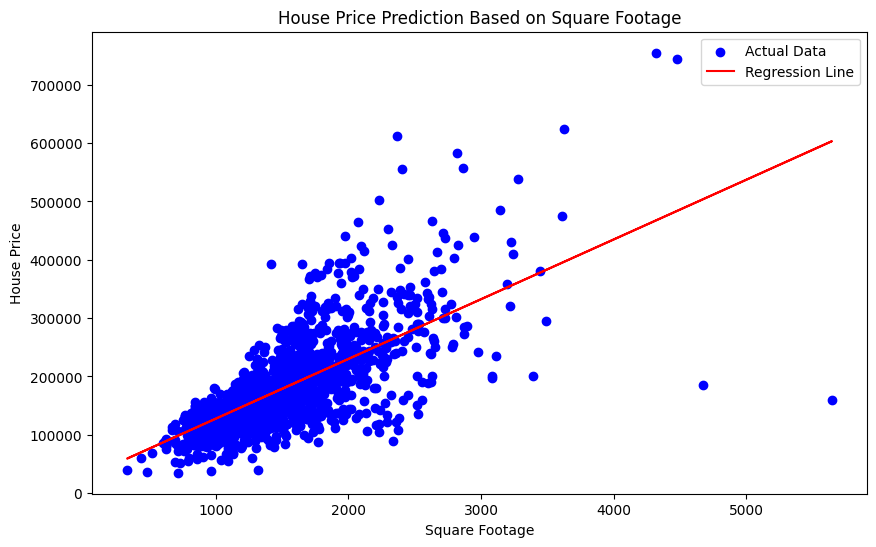

In [34]:
# Your code here - import StatsModels, fit baseline model, display results
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

x = np.array(GrLivArea).reshape(-1, 1)
y = np.array(SalePrice)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R-squared and Mean Squared Error for the model's performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display the model's slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

print("Model Interpretation:")
print(f"Slope (m): {slope:.2f}")
print(f"Intercept (b): {intercept:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Plotting the regression line with the data points
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, model.predict(x), color='red', label='Regression Line')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.title('House Price Prediction Based on Square Footage')
plt.legend()
plt.show()

In [ ]:
# Your written answer here - interpret model results
Each additional square foot adds $102.49 to the house price, starting from a base of $24,899.75. With an R² of 0.55, square footage explains 55% of price variation, though a high MSE suggests other factors impact pricing.


## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [36]:
# Your code here - define X
x = ames[['1stFlrSF', 'GrLivArea']]
x

,1stFlrSF,GrLivArea
Id,,
1,856,1710
2,1262,1262
3,920,1786
4,961,1717
5,1145,2198
...,...,...
1456,953,1647
1457,2073,2073
1458,1188,2340


In [38]:
# Your code here - fit model and display results
import statsmodels.api as sm
second_model = sm.OLS(y, sm.add_constant(x))
second_results = second_model.fit()

print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     941.7
Date:                Tue, 12 Nov 2024   Prob (F-statistic):          3.05e-263
Time:                        15:18:22   Log-Likelihood:                -17938.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1457   BIC:                         3.590e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.434e+04   4780.943     -3.000      0.0

In [ ]:
# Your written answer here - interpret model results. Does this model seem better than the previous one?

#The equation is:

𝑦 = − 14340 + 61.91 × 1stFlrSF + 81.35 × GrLivArea

Each square foot of 1stFlrSF adds $61.91, and GrLivArea adds $81.35, with an R² of 0.564 indicating moderate explanatory power.

Yes, this model is better with a higher R² (0.564 vs. 0.55) and uses two predictors, improving its explanatory power.


## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

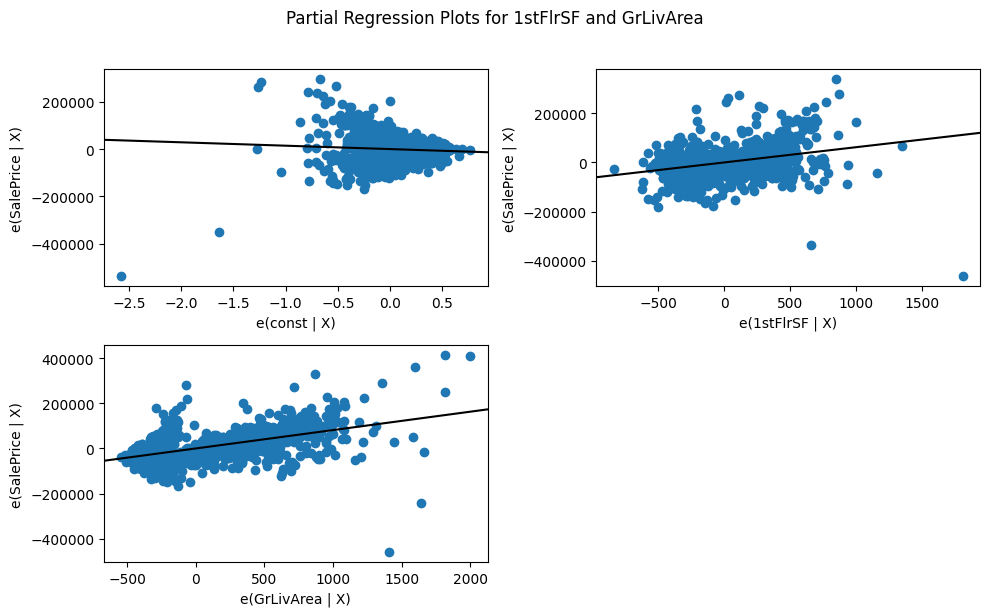

In [39]:
# Your code here - create partial regression plots for each predictor

# Assuming '1stFlrSF' and 'GrLivArea' are the predictors and 'SalePrice' is the dependent variable
X = ames_subset[['1stFlrSF', 'GrLivArea']]
X = sm.add_constant(X)  # Adds an intercept to the model
y = ames_subset['SalePrice']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Plot partial regression plots for each predictor
fig = sm.graphics.plot_partregress_grid(model, fig=plt.figure(figsize=(10, 6)))
fig.suptitle('Partial Regression Plots for 1stFlrSF and GrLivArea', y=1.02)
plt.tight_layout()
plt.show()


In [ ]:

The partial regression plots show positive relationships between both 1stFlrSF and GrLivArea with SalePrice, even after accounting for each other. This confirms the model’s positive coefficients for these predictors, indicating that both features independently contribute to increasing SalePrice.



## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [45]:
# Your code here - import linear regression from scikit-learn and create and fit model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R-squared and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Get the model's coefficients
intercept = model.intercept_
coefficients = model.coef_

# Display results
print("Model Performance:")
print(f"Intercept (b): {intercept}")
print(f"Coefficients (m): {coefficients}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


Model Performance:
Intercept (b): -6540.700008166605
Coefficients (m): [58.02981538 78.64652206]
R-squared: 0.63
Mean Squared Error (MSE): 2865566846.86


In [ ]:
# Your code here - compare R-Squared

In [ ]:
# Your code here - compare intercept and coefficients

## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.